# Transfer matrix method for effective spin-foam cosmology

## Definitions and setup

In [ ]:
using Pkg
Pkg.activate("/Users/jercheal/.julia/environments/v1.11/transfer_matrix/")
using Plots
include("wynn.jl")

  Activating project at `~/.julia/environments/v1.11/transfer_matrix`


wynn (generic function with 1 method)

In [38]:
function height(j0::Float64, j1::Float64, k::Float64)
    res_squared = ((j0 - j1)^2 + 8*k^2)/(2 * (sqrt(j0) + sqrt(j1))^2)
    res = sqrt(complex(res_squared))
    return real(res)
end

function four_volume(j0::Float64, j1::Float64, k::Float64)
    res_squared = (j0 + j1)^2/32 * ((j0 - j1)^2 + 8*k^2)
    res = sqrt(complex(res_squared))
    return real(res)
end

function S_III(j0::Float64, j1::Float64, k::Float64, Λ::Float64) 
    res = 6 * (j0 - j1) * asinh((j1 - j0) / (sqrt(complex(16*k^2 + (j1 - j0)^2)))) + 12 * k * (pi/2 - acos((j0 - j1)^2 / (16*k^2 + (j0 - j1)^2))) - Λ * four_volume(j0, j1, k)
    return real(res)
end

function μ_ESF(j0::Float64, j1::Float64, k::Float64)
    res = 4/sqrt(2) * (height(j0, j1, k) * (sqrt(j0) + sqrt(j1)))^(-3/2) * k
    return real(res)
end

μ_ESF (generic function with 1 method)

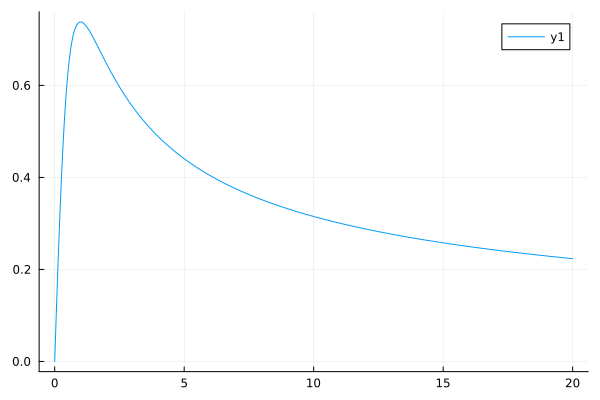

In [39]:
ks = range(0.0, 20.0, 1000)
S_III_vals = [S_III(1.0, 3.0, k, 10.0) for k in ks]
measure_vals = [μ_ESF(1.0, 3.0, k) for k in ks]
plot(ks,measure_vals)